### Import Libraries and Dataset


In [59]:
#All the libralies used in this project

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt

In [60]:
#Load data
diamonds_ds = pd.read_csv("diamonds.csv")
diamonds_ds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Data Visualization

In [61]:
diamonds_ds.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [62]:
diamonds_ds.shape

(53940, 11)

Text(0.5, 1.0, 'Distribution of Diamond Price')

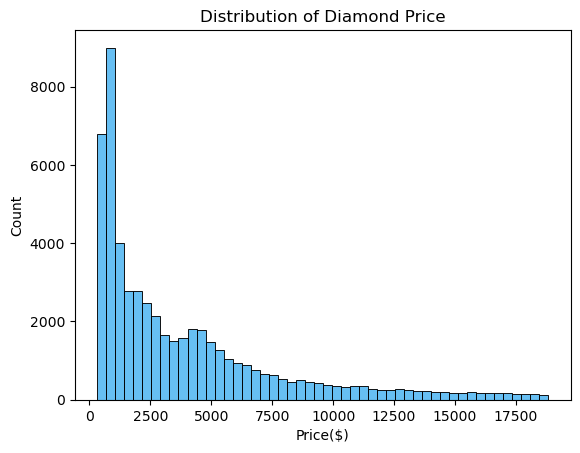

In [63]:
# Plotting a actual price distribution.
sns.histplot(diamonds_ds['price'], color='#34AAF0', bins=50)
plt.xlabel('Price($)')
plt.ylabel('Count')
plt.title('Distribution of Diamond Price')

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Diamond Cut')

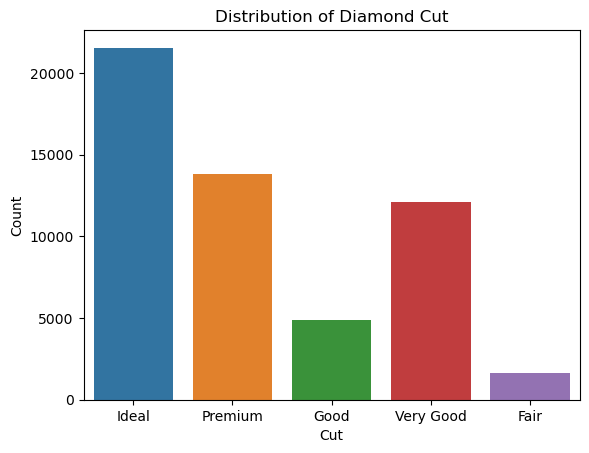

In [64]:
# Information related to various type of Diamond cut.
sns.countplot(diamonds_ds['cut'])
plt.xlabel('Cut')
plt.ylabel('Count')
plt.xticks(rotation='horizontal')
plt.title('Distribution of Diamond Cut')

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of diamonds colors')

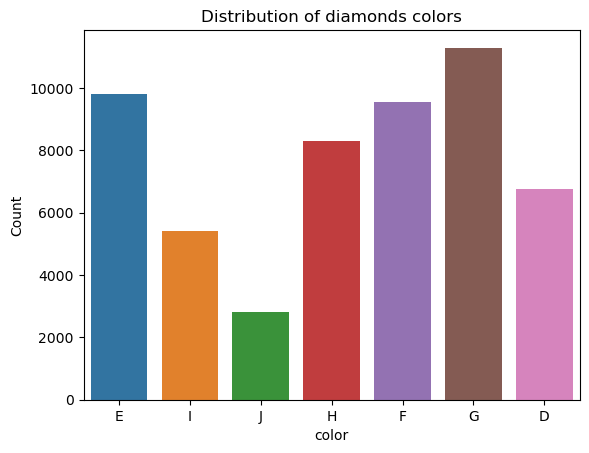

In [65]:
# Information related to various colors of diamonds.
sns.countplot(diamonds_ds['color'])
plt.xlabel('color')
plt.ylabel('Count')
plt.xticks(rotation='horizontal')
plt.title('Distribution of diamonds colors')

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of clarities of diamonds')

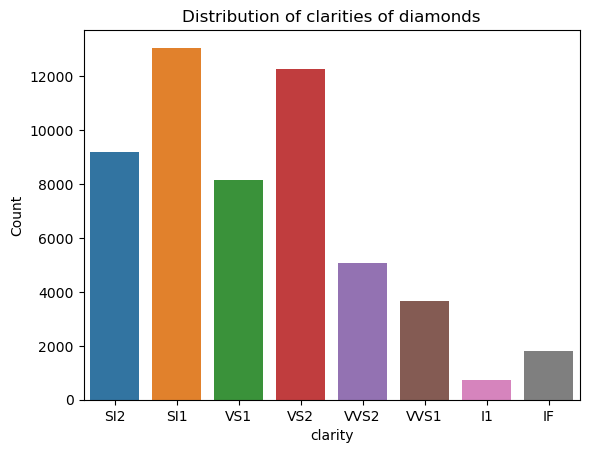

In [66]:
# Information related to various clarities of diamonds.
sns.countplot(diamonds_ds['clarity'])
plt.xlabel('clarity')
plt.ylabel('Count')
plt.xticks(rotation='horizontal')
plt.title('Distribution of clarities of diamonds')

### Data Preprocessing

In [67]:
diamonds_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [68]:
diamonds_ds.corr()['price']

Unnamed: 0   -0.306873
carat         0.921591
depth        -0.010647
table         0.127134
price         1.000000
x             0.884435
y             0.865421
z             0.861249
Name: price, dtype: float64

In [69]:
#The first column is index and it remove from dataset
diamonds_ds = diamonds_ds.drop(["Unnamed: 0"], axis=1)
diamonds_ds.head(4)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


In [70]:
diamonds_ds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [71]:
duplicates = diamonds_ds.duplicated()
print(duplicates.sum())

146


In [72]:
# display the final shape of the dataset
diamond_dataset.shape

(53920, 10)

In [73]:
diamonds_ds.drop_duplicates(inplace=True)

In [74]:
duplicates = diamonds_ds.duplicated()
print(duplicates.sum())

0


In [75]:
#Dropping the outliers. 
diamonds_ds = diamonds_ds[(diamonds_ds["depth"]<75)&(diamonds_ds["depth"]>45)]
diamonds_ds = diamonds_ds[(diamonds_ds["table"]<80)&(diamonds_ds["table"]>40)]
diamonds_ds = diamonds_ds[(diamonds_ds["x"]<30)]
diamonds_ds = diamonds_ds[(diamonds_ds["y"]<30)]
diamonds_ds = diamonds_ds[(diamonds_ds["z"]<30)&(diamonds_ds["z"]>2)]
diamonds_ds.shape

(53763, 10)

In [76]:
# Get list of categorical variables
s = (diamonds_ds.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


Text(0.5, 0, 'Cut')

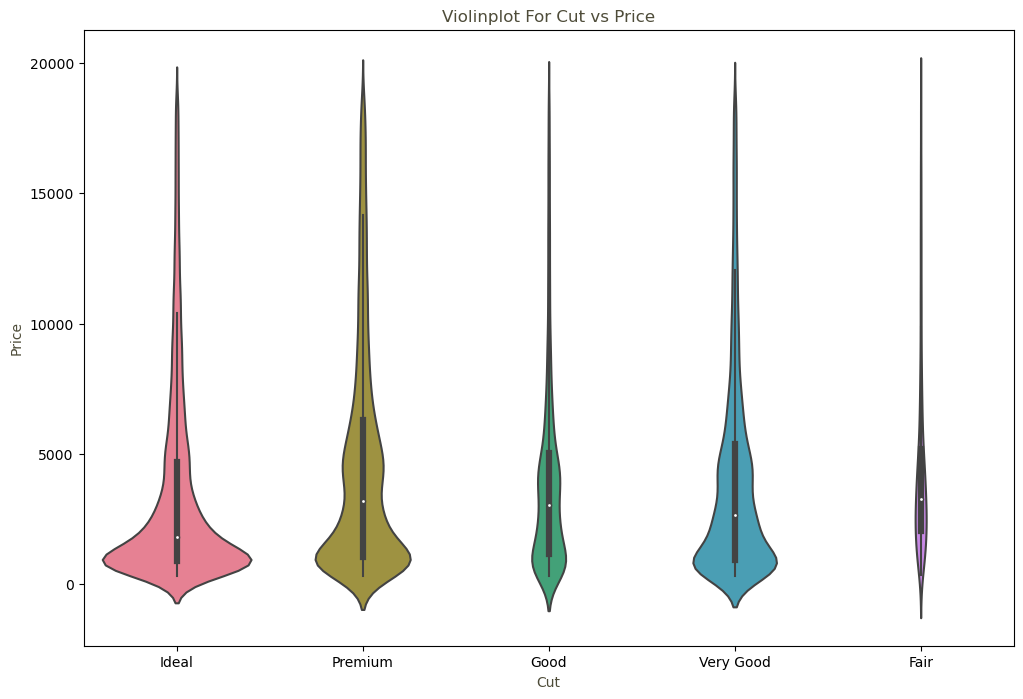

In [77]:
# Define a color palette
shade = sns.color_palette("husl", 5)

plt.figure(figsize=(12,8))
ax = sns.violinplot(x="cut",y="price", data=diamonds_ds, palette=shade,scale= "count")
ax.set_title("Violinplot For Cut vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Cut", color="#4e4c39")

In [78]:
# Make copy to avoid changing original data 
lb_diamonds = diamonds_ds.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    lb_diamonds[col] = label_encoder.fit_transform(lb_diamonds[col])
lb_diamonds.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48
6,0.24,4,5,6,62.3,57.0,336,3.95,3.98,2.47
7,0.26,4,4,2,61.9,55.0,337,4.07,4.11,2.53
8,0.22,0,1,5,65.1,61.0,337,3.87,3.78,2.49
9,0.23,4,4,4,59.4,61.0,338,4.00,4.05,2.39


In [79]:
lb_diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [80]:
lb_diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53763.000000,53763.000000,53763.000000,53763.000000,53763.000000,53763.000000,53763.000000,53763.000000,53763.000000,53763.000000
mean,0.797460,2.554247,2.593698,3.836188,61.748781,57.457207,3930.785336,5.731405,5.733299,3.539367
std,0.473136,1.027364,1.701283,1.724832,1.419309,2.226311,3985.807738,1.118563,1.110473,0.690879
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


<AxesSubplot:>

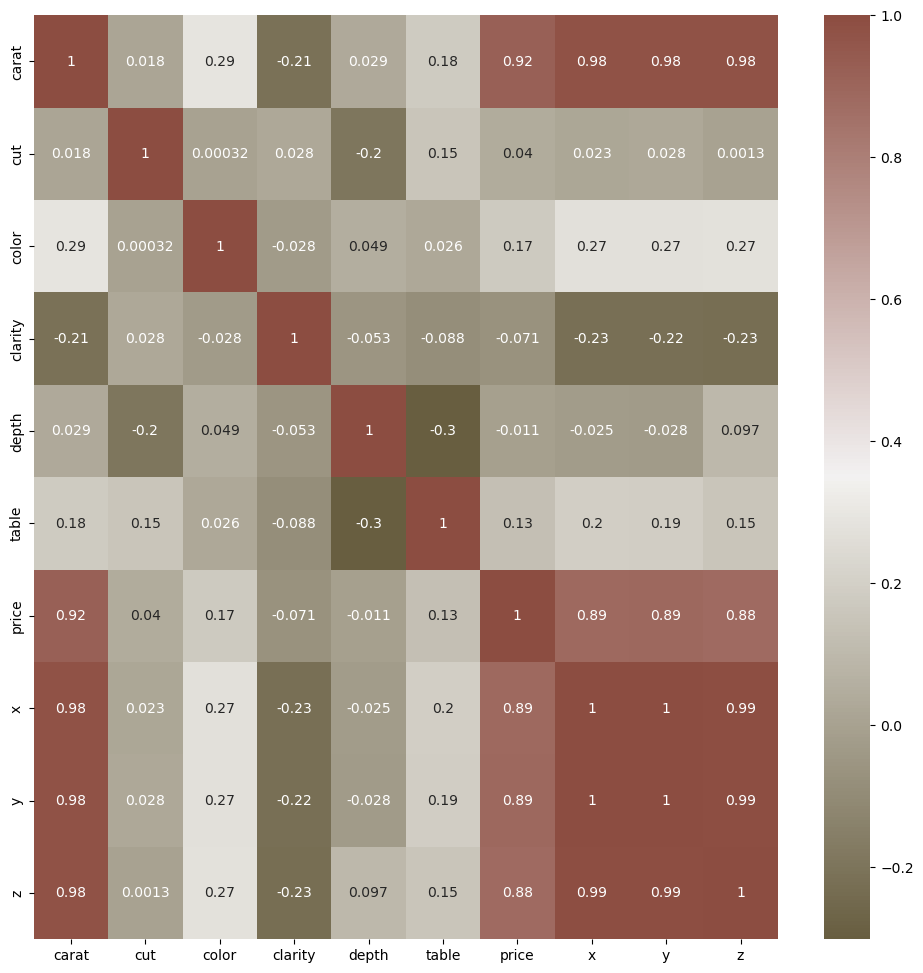

In [81]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= lb_diamonds.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [82]:
#define training values as ds_train and testing values as ds_testing
ds_train= lb_diamonds.drop(["price"],axis =1)
ds_testing= np.log(lb_diamonds["price"])

In [83]:
#splits the data into training and testing sets using scikit-learn's
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ds_train, ds_testing,test_size=0.25, random_state=7)


### Training the model using Linear Regression Algorithm (Multiple)

In [89]:
#define linear regression model
model=LinearRegression()
#fit the model
model.fit(X_train,y_train)

LinearRegression()

In [90]:
#get coffiecient and intercept
print('Coefficient : ',model.coef_)
print('Intercept : ',model.intercept_)

Coefficient :  [-1.01714219  0.0038537  -0.06442484  0.06520666 -0.0014126  -0.00463962
  0.41897557  0.4492216   0.78154297]
Intercept :  1.1157290474084576


In [92]:
#check the predictions 
predicted_target=model.predict(X_test)

In [96]:
# Evaluate the accuracy of the model using  R-Square score
from sklearn import metrics

# Model Evaluation
print("R^2:",metrics.r2_score(y_test, predicted_target))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predicted_target))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predicted_target))
print("MSE:",metrics.mean_squared_error(y_test, predicted_target))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predicted_target)))

R^2: 0.9578647943815817
Adjusted R^2: 0.9578365599351096
MAE: 0.15837884630616364
MSE: 0.043512508965351054
RMSE: 0.2085965219397271


### Graphical visualization for the predicted value and actual values

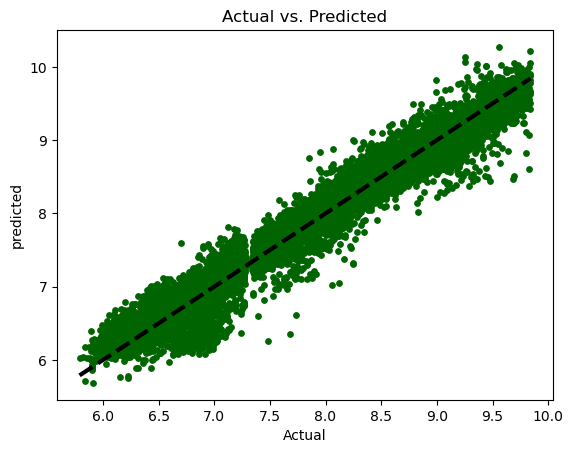

In [99]:
fig, ax = plt.subplots()
colors = np.random.rand(len(y_test))
ax.scatter(y_test, predicted_target, c='darkgreen',s=15)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Actual')
ax.set_ylabel('predicted')
plt.title('Actual vs. Predicted')
plt.show()


In [100]:
pred_value = model.predict([[0.29,3,5,5,62.4,58.0,4.20,4.23,2.63]])
result = np.exp(pred_value)
print(result)

[489.971271]


D:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [102]:
#export pickle file for use in website
import pickle
with open('linear_regressor.pickle', 'wb') as file:
    pickle.dump(model, file)